## Transfer Learning Inception V3 using Keras

In [ ]:
pip install split-folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import splitfolders
splitfolders.ratio('/content/drive/MyDrive/Orange/data', output="/content/drive/MyDrive/Orange/output", seed=1337, ratio=(0.7, 0.2,0.1)) 

ValueError: ignored

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession
import glob
import matplotlib.pyplot as plt
config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [ ]:


from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3    #inceptionV3

from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [ ]:
import os
a=['test/Decayed','test/Healthy','test/Infected','test/Other Leaves','train/Decayed','train/Healthy','train/Infected','train/Other Leaves','val/Decayed','val/Healthy','val/Infected','val/Other Leaves']
for FOLDER_PATH in a:
  ROOT_PATH = '/content/drive/MyDrive/'
  print(FOLDER_PATH,len(os.listdir(os.path.join(ROOT_PATH, FOLDER_PATH))))

test/Decayed 96
test/Healthy 61
test/Infected 134
test/Other Leaves 108
train/Decayed 669
train/Healthy 417
train/Infected 930
train/Other Leaves 748
val/Decayed 191
val/Healthy 118
val/Infected 262
val/Other Leaves 213


In [ ]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/train'
valid_path = '/content/drive/MyDrive/test'


In [ ]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)




87910968/87910968 [==============================] - 5s 0us/step


In [ ]:
# don't train existing weights
for layer in inception.layers:
    layer.trainable = False

In [ ]:
  # useful for getting number of output classes
folders = glob('/content/drive/MyDrive/test*')

In [ ]:
# our layers - you can add more if you want
x = Flatten()(inception.output)

In [ ]:
len(folders)

1

In [ ]:
prediction = Dense(4,name='output', activation='softmax')(x)

# create a model object
model = Model(inputs=inception.input, outputs=prediction)

In [ ]:

# view the structure of the model
model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

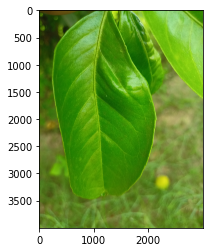

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np
img1 = image.load_img('/content/drive/MyDrive/Final Dataset Orange/train/Healthy/h60.png')
plt.imshow(img1);

#preprocess image
img1 = image.load_img('/content/drive/MyDrive/Final Dataset Orange/train/Healthy/h60.png', target_size=(256, 256))
img = image.img_to_array(img1)
img = img/255
img = np.expand_dims(img, axis=0)

NameError: ignored

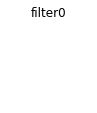

In [ ]:
import matplotlib.image as mpimg

fig=plt.figure(figsize=(14,7))
columns = 8
rows = 4
for i in range(columns*rows):
    #img = mpimg.imread()
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter'+str(i))
    plt.imshow(max_pooling2d_1_features[0, :, :, i], cmap='viridis')
plt.show()

In [ ]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [ ]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/train',
                                                 target_size = (224, 224),
                                                 batch_size = 16,
                                                 class_mode = 'categorical')

Found 2764 images belonging to 4 classes.


In [ ]:
training_set

In [ ]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/test',
                                            target_size = (224, 224),
                                            batch_size = 16,
                                            class_mode = 'categorical')

Found 399 images belonging to 4 classes.


In [ ]:
len(test_set)

25

In [ ]:
len(training_set)

173

In [ ]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=2,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/2
173/173 [==============================] - 517s 3s/step - loss: 0.5362 - accuracy: 0.9320 - val_loss: 0.6851 - val_accuracy: 0.9198
Epoch 2/2
173/173 [==============================] - 504s 3s/step - loss: 0.6719 - accuracy: 0.9222 - val_loss: 0.6823 - val_accuracy: 0.9173


In [ ]:
import matplotlib.pyplot as plt

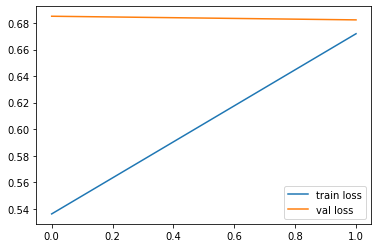

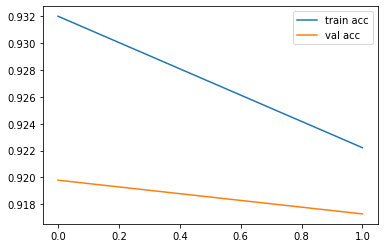

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_inception.h5')

In [ ]:
TF_LITE_MODEL_FILE_NAME="tf_lite_model.tflite"

In [ ]:
import tensorflow

In [ ]:
tf_lite_converter=tensorflow.lite.TFLiteConverter.from_keras_model(model)
tflite_model=tf_lite_converter.convert()

In [ ]:
tflite_model_name=TF_LITE_MODEL_FILE_NAME
open(tflite_model_name,"wb").write(tflite_model)

87942460

In [ ]:
convert_bytes(get_file_size(TF_LITE_MODEL_FILE_NAME),"KB")

NameError: ignored

In [ ]:
interpreter=tensorflow.lite.Interpreter(model_path=TF_LITE_MODEL_FILE_NAME)
input_details= interpreter.get_input_details()
output_details = interpreter.get_output_details()
print(input_details[0]['shape'])
print(input_details[0]['dtype'])
print(output_details[0]['shape'])
print(output_details[0]['dtype'])

[  1 224 224   3]
<class 'numpy.float32'>
[1 4]
<class 'numpy.float32'>


In [ ]:
valid_path

'/content/drive/MyDrive/test'

In [ ]:
path = '/content/drive/MyDrive/test/'

In [ ]:
test_data = []
ids = []
import os

for img in os.listdir(path):
  ids.append(img.split('.')[0])
  test_data.append(path+img)


In [ ]:
import pandas as pd
test_df = pd.DataFrame({'path':test_data})

In [ ]:
test_df.head()

,path
0,/content/drive/MyDrive/test/Other Leaves
1,/content/drive/MyDrive/test/Infected
2,/content/drive/MyDrive/test/Decayed
3,/content/drive/MyDrive/test/Healthy


In [ ]:

y_pred = model.predict(test_set)


NameError: ignored

In [ ]:
y_pred

array([[2.2867112e-29, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00],
       [1.3143298e-15, 1.0000000e+00, 1.3711820e-24, 3.7902772e-38],
       ...,
       [1.0000000e+00, 0.0000000e+00, 9.8927887e-36, 2.9906198e-25],
       [9.8955259e-17, 0.0000000e+00, 1.0000000e+00, 8.2782026e-20],
       [1.0000000e+00, 0.0000000e+00, 6.0089655e-12, 1.8002416e-23]],
      dtype=float32)

In [ ]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

NameError: ignored

In [ ]:
y_pred

NameError: ignored

TypeError: ignored

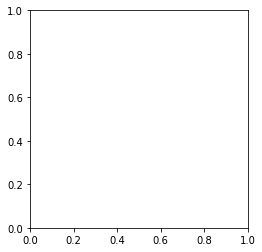

In [ ]:
plt.imshow('/content/drive/MyDrive/test/Healthy/IMG_20220824_160749_BURST9.jpg')
plt.show()

TypeError: ignored

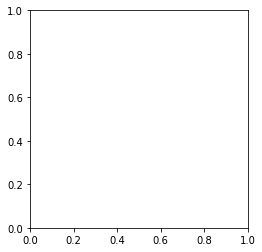

In [ ]:
import cv2
img='IMG20220824164022_BURST005.jpg'
img = cv2.imread(img)
plt.imshow(img)

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [ ]:
model=load_model('model_inception.h5')

In [ ]:
import tensorflow

In [ ]:
tf_lite_converter=tensorflow.lite.TFLiteConverter.from_keras_model(model)
tflite_model=tf_lite_converter.convert()

In [ ]:
img_data

NameError: ignored

In [ ]:
img=image.load_img('/content/drive/MyDrive/test/Decayed/IMG20220824163933_BURST005.jpg',target_size=(224,224))



FileNotFoundError: ignored

In [ ]:
x=image.img_to_array(img)
x

ValueError: ignored

In [ ]:
imread()

NameError: ignored

In [ ]:
x.shape

(224, 224, 3)

In [ ]:
x=x/255

In [ ]:
import numpy as np
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [ ]:
model.predict(img_data)

array([[0.9980813 , 0.00191865]], dtype=float32)

In [ ]:
a=np.argmax(model.predict(img_data), axis=1)

In [ ]:
a==0

array([ True])

In [ ]:
import tensorflow as tf

In [ ]:
tf.__version__

'2.2.0'

In [ ]:
!nvidia-smi

Fri Sep  9 18:53:06 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------